In [2]:
# Plot the proportion of NMD regions which overlap with a protein domain.

import pandas as pd
import pandas_checks as pdc
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
from statannotations.Annotator import Annotator
from statsmodels.stats import proportion

import vis

FILE_IN = "data/statistics/proportion_nmd_regions_overlapping_pfam_domains.tsv"
PNG = "data/plots/pfam_domains/nmd_regions_overlapping_pfam_domains.png"
SVG = "data/plots/pfam_domains/nmd_regions_overlapping_pfam_domains.svg"

In [3]:
df = pd.read_csv(FILE_IN, sep="\t").check.function()

,constraint,region,count,total,prop,ci_lo,ci_hi,err_hi,err_lo
0,Unconstrained,NMD target,6997,7766,0.90,0.89,0.91,0.01,0.01
1,Unconstrained,Start proximal,7779,14351,0.54,0.53,0.55,0.01,0.01
2,Unconstrained,Long exon,830,1642,0.51,0.48,0.53,0.02,0.02
3,Unconstrained,Distal,8705,12818,0.68,0.67,0.69,0.01,0.01
4,Constrained,NMD target,2132,2216,0.96,0.95,0.97,0.01,0.01
5,Constrained,Start proximal,57,101,0.56,0.47,0.66,0.10,0.10
6,Constrained,Long exon,184,396,0.46,0.42,0.51,0.05,0.05
7,Constrained,Distal,460,612,0.75,0.72,0.79,0.03,0.03


In [4]:
# Overlap of NMD regions with protein domains (ignoring constraint)
df.groupby("region").agg(count=("count","sum"), total=("total","sum")).assign(pro=lambda x: x["count"] / x["total"])

,count,total,pro
region,,,
Distal,9165,13430,0.682427
Long exon,1014,2038,0.497547
NMD target,9129,9982,0.914546
Start proximal,7836,14452,0.542209


In [5]:
# Quantify statistical difference between constrained and unconstrained regions
dfg_region = df.groupby("region", sort=False)

print("Two-sample Z test of proportions, constrained vs unconstrained")

for name, data in dfg_region:
    count = data["count"]
    nobs = data["total"]
    z, p = proportion.proportions_ztest(count, nobs, alternative="two-sided")
    print(f"{name}:\n\tZ={z}\n\tP={p}")

Two-sample Z test of proportions, constrained vs unconstrained
NMD target:
	Z=-9.077280217968688
	P=1.11321727493653e-19
Start proximal:
	Z=-0.44832822667372785
	P=0.6539163322708069
Long exon:
	Z=1.4588015096108438
	P=0.1446197470023705
Distal:
	Z=-3.7644476951189034
	P=0.00016691760093622387


[[0.00664311 0.00815146 0.02418274 0.0080813 ]
 [0.00664311 0.00815146 0.02418274 0.0080813 ]]
[[0.00795109 0.09670074 0.04912269 0.03423116]
 [0.00795109 0.09670074 0.04912269 0.03423116]]


/mnt/iusers01/bk01/m40482ab/miniconda3/envs/ukb/lib/python3.8/site-packages/statannotations/compat.py:926: UserWarning: cannot find group0 of pair in the group tuples: ('NMD target', 'Unconstrained') not in [('NMD target',), ('Start proximal',), ('Long exon',), ('Distal',)]
  warnings.warn(msg)
/mnt/iusers01/bk01/m40482ab/miniconda3/envs/ukb/lib/python3.8/site-packages/statannotations/compat.py:926: UserWarning: cannot find group1 of pair in the group tuples: ('NMD target', 'Constrained') not in [('NMD target',), ('Start proximal',), ('Long exon',), ('Distal',)]
  warnings.warn(msg)
/mnt/iusers01/bk01/m40482ab/miniconda3/envs/ukb/lib/python3.8/site-packages/statannotations/compat.py:926: UserWarning: cannot find group0 of pair in the group tuples: ('Start proximal', 'Unconstrained') not in [('NMD target',), ('Start proximal',), ('Long exon',), ('Distal',)]
  warnings.warn(msg)
/mnt/iusers01/bk01/m40482ab/miniconda3/envs/ukb/lib/python3.8/site-packages/statannotations/compat.py:926: Use

ValueError: pairs are empty after parsing: original_pairs=[(('NMD target', 'Unconstrained'), ('NMD target', 'Constrained')), (('Start proximal', 'Unconstrained'), ('Start proximal', 'Constrained')), (('Long exon', 'Unconstrained'), ('Long exon', 'Constrained')), (('Distal', 'Unconstrained'), ('Distal', 'Constrained'))]
not in group_list=[('NMD target',), ('Start proximal',), ('Long exon',), ('Distal',)]

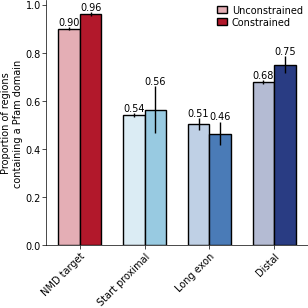

In [7]:
fig, ax = plt.subplots(figsize=(8 / 2.54, 8 / 2.54), layout="constrained")

# Plot grouped bar chart
dark_colors = ["#B2182B", "#98CAE1", "#4A7BB7", "#293C83"]
light_colors = [vis.adjust_alpha(c, 0.35) for c in dark_colors]

vis.plot.grouped_vertical_bar(
    df,
    "region",
    "constraint",
    "prop",
    ax=ax,
    bar_label_fmt="{:.2f}",
    err_columns=["err_lo", "err_hi"],
    edgecolor="k",
    colors=[light_colors, dark_colors],
)
## Legend
legend = ax.legend()
for t in legend.get_texts():
    t.set_color("k")

## Axis labels
ax.set_ylabel("Proportion of regions\ncontaining a Pfam domain")
vis.utils.rotate_tick_labels("x", ax=ax)

# Add stats annotation
pairs = [
    (("NMD target", "Unconstrained"), ("NMD target", "Constrained")),
    (("Start proximal", "Unconstrained"), ("Start proximal", "Constrained")),
    (("Long exon", "Unconstrained"), ("Long exon", "Constrained")),
    (("Distal", "Unconstrained"), ("Distal", "Constrained")),
]
pvals = [
    1.11321727493653e-19,
    0.6539163322708069,
    0.1446197470023705,
    0.00016691760093622387,
]
annot = Annotator(
    ax=ax, pairs=pairs, data=df, x="region", y="prop", hue="constraint", plot="boxplot"
)
vis.utils.configure_annotator(
    annot, test=None, pvalue_format_string="{:.3G}"
).set_pvalues(pvals).annotate()

# Save figure
plt.savefig(PNG, dpi=600)
plt.savefig(SVG)